In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.patches import ConnectionPatch
plt.style.use('ggplot')

## Nationalities

In [2]:
nationalities = pd.read_excel('data/Nationality.xlsx')
nationalities = nationalities.dropna()
nationalities.set_index('Data Series', inplace=True)
nationalities.index = nationalities.index.str.strip()
nationalities.columns = nationalities.columns.str.strip()
nationalities.head()

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,1978 Oct,1978 Sep,1978 Aug,1978 Jul,1978 Jun,1978 May,1978 Apr,1978 Mar,1978 Feb,1978 Jan
Data Series,,,,,,,,,,,,,,,,,,,,,
Total International Visitor Arrivals By Inbound Tourism Markets,728744,726602,543733,418458,295095,121207,67764,57174,92796,41179,...,177639,167980,201355,175968,149896,162667,162400,163199,147954,167016
Southeast Asia,315820,332110,269088,204656,137294,41170,18759,17563,30006,12937,...,71707,75304,82899,73672,67746,68036,73782,63299,57650,64500
Brunei Darussalam,3426,3238,2202,2271,807,280,163,113,231,138,...,na,na,na,na,na,na,na,na,na,na
Indonesia,108252,119072,110094,86745,58330,13622,6872,5885,11177,5756,...,na,na,na,na,na,na,na,na,na,na
Malaysia,63905,61572,49878,43214,25319,10610,4467,5203,10939,2537,...,na,na,na,na,na,na,na,na,na,na


In [3]:
nationalities = nationalities.loc[
    :, [x for x in nationalities.columns if int(x.split()[0]) >= 2000]
]
nationalities.fillna(0, inplace=True)
nationalities.replace({'na': 0}, inplace=True)

In [4]:
nationalities.head()

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2000 Oct,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan
Data Series,,,,,,,,,,,,,,,,,,,,,
Total International Visitor Arrivals By Inbound Tourism Markets,728744,726602,543733,418458,295095,121207,67764,57174,92796,41179,...,636185,612708,695965,707413,609008,595838,636970,640922,601281,637852
Southeast Asia,315820,332110,269088,204656,137294,41170,18759,17563,30006,12937,...,197577,187575,186800,216845,201640,190775,208686,193663,169471,226457
Brunei Darussalam,3426,3238,2202,2271,807,280,163,113,231,138,...,3958,4545,6658,5448,5533,4586,5527,3628,3538,4138
Indonesia,108252,119072,110094,86745,58330,13622,6872,5885,11177,5756,...,105711,94625,96891,128207,105539,91843,100059,102620,88342,149528
Malaysia,63905,61572,49878,43214,25319,10610,4467,5203,10939,2537,...,45592,50267,43952,43423,48426,48783,47993,43849,42072,41261


In [5]:
nationalities['Total'] = nationalities.sum(axis=1)

In [6]:
nationalities.index

Index(['Total International Visitor Arrivals By Inbound Tourism Markets',
       'Southeast Asia', 'Brunei Darussalam', 'Indonesia', 'Malaysia',
       'Myanmar', 'Philippines', 'Thailand', 'Vietnam',
       'Other Markets In Southeast Asia', 'Greater China', 'China',
       'Hong Kong SAR', 'Taiwan', 'Other Markets In Greater China',
       'North Asia', 'Japan', 'South Korea', 'Other Markets In North Asia',
       'South Asia', 'Bangladesh', 'India', 'Pakistan', 'Sri Lanka',
       'Other Markets In South Asia', 'West Asia', 'Iran', 'Israel', 'Kuwait',
       'Saudi Arabia', 'United Arab Emirates', 'Other Markets In West Asia',
       'Americas', 'Canada', 'USA', 'Other Markets In Americas', 'Europe',
       'Belgium & Luxembourg', 'Denmark', 'Finland', 'France', 'Germany',
       'Italy', 'Netherlands', 'Norway', 'Rep Of Ireland',
       'Russian Federation', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom', 'Other Markets In Europe', 'Oceania', 'Australia',
       'New Zea

In [7]:
regions = nationalities.loc(axis=0)[
    'Southeast Asia', 'North Asia', 'South Asia', 'Americas',
    'Europe', 'Oceania', 'Africa'
]
regions.head()

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan,Total
Data Series,,,,,,,,,,,,,,,,,,,,,
Southeast Asia,315820,332110,269088,204656,137294,41170,18759,17563,30006,12937,...,187575,186800,216845,201640,190775,208686,193663,169471,226457,92519989
North Asia,50394,40868,25153,16953,9940,3555,2508,2505,2770,2032,...,0,0,0,0,0,0,0,0,0,17217087
South Asia,94325,94977,76667,69978,52271,36779,20077,16901,33939,11879,...,41994,42366,43995,51863,56557,44475,35841,32902,33926,21095525
Americas,44100,47360,36723,25106,14729,6521,4442,2928,4590,2231,...,34764,39201,42133,39138,36733,36515,46652,43103,41004,11816768
Europe,110258,83292,48879,42110,32971,14625,10444,7225,9450,5668,...,83964,102605,92623,70483,73074,98348,104919,103653,94075,29342043


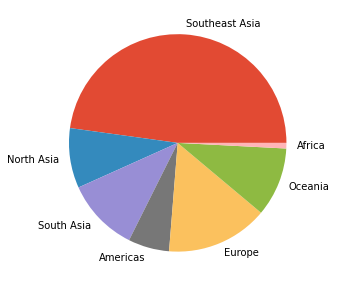

In [8]:
plt.figure(figsize=(10,5))
plt.pie(regions['Total'], labels=regions.index)
plt.show()

In [9]:
sea_df = nationalities.loc(axis=0)[
    'Brunei Darussalam', 'Indonesia', 'Malaysia',
    'Myanmar', 'Philippines', 'Thailand', 'Vietnam',
    'Other Markets In Southeast Asia'
]
sea_df

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan,Total
Data Series,,,,,,,,,,,,,,,,,,,,,
Brunei Darussalam,3426,3238,2202,2271,807,280,163,113,231,138,...,4545,6658,5448,5533,4586,5527,3628,3538,4138,1256762
Indonesia,108252,119072,110094,86745,58330,13622,6872,5885,11177,5756,...,94625,96891,128207,105539,91843,100059,102620,88342,149528,45948265
Malaysia,63905,61572,49878,43214,25319,10610,4467,5203,10939,2537,...,50267,43952,43423,48426,48783,47993,43849,42072,41261,18270590
Myanmar,8594,10398,9095,6218,5474,3516,2024,2954,2991,1242,...,1655,1822,1669,2062,1831,1971,1790,1525,1479,1642353
Philippines,42542,45336,32139,22379,16940,6250,2026,1469,1966,2450,...,13683,14168,13936,14706,18790,19269,16490,13111,11809,10196251
Thailand,33284,36590,23406,18487,10647,3038,1622,1060,1421,361,...,19266,19311,20357,21446,21959,29985,22217,16981,15792,8338946
Vietnam,48939,48869,36857,21570,16657,2932,1055,627,840,407,...,2584,3227,2978,3251,2246,2830,2457,3073,1698,5965210
Other Markets In Southeast Asia,6878,7035,5417,3772,3120,922,530,252,441,46,...,0,0,0,0,0,0,0,0,0,836426


In [10]:
new_row = sea_df.loc['Other Markets In Southeast Asia'] + sea_df.loc['Brunei Darussalam'] + sea_df.loc['Myanmar']
sea_df.loc['Others'] = new_row
sea_df.drop(index=['Brunei Darussalam', 'Other Markets In Southeast Asia', 'Myanmar'], inplace=True)
sea_df

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan,Total
Data Series,,,,,,,,,,,,,,,,,,,,,
Indonesia,108252,119072,110094,86745,58330,13622,6872,5885,11177,5756,...,94625,96891,128207,105539,91843,100059,102620,88342,149528,45948265
Malaysia,63905,61572,49878,43214,25319,10610,4467,5203,10939,2537,...,50267,43952,43423,48426,48783,47993,43849,42072,41261,18270590
Philippines,42542,45336,32139,22379,16940,6250,2026,1469,1966,2450,...,13683,14168,13936,14706,18790,19269,16490,13111,11809,10196251
Thailand,33284,36590,23406,18487,10647,3038,1622,1060,1421,361,...,19266,19311,20357,21446,21959,29985,22217,16981,15792,8338946
Vietnam,48939,48869,36857,21570,16657,2932,1055,627,840,407,...,2584,3227,2978,3251,2246,2830,2457,3073,1698,5965210
Others,18898,20671,16714,12261,9401,4718,2717,3319,3663,1426,...,6200,8480,7117,7595,6417,7498,5418,5063,5617,3735541


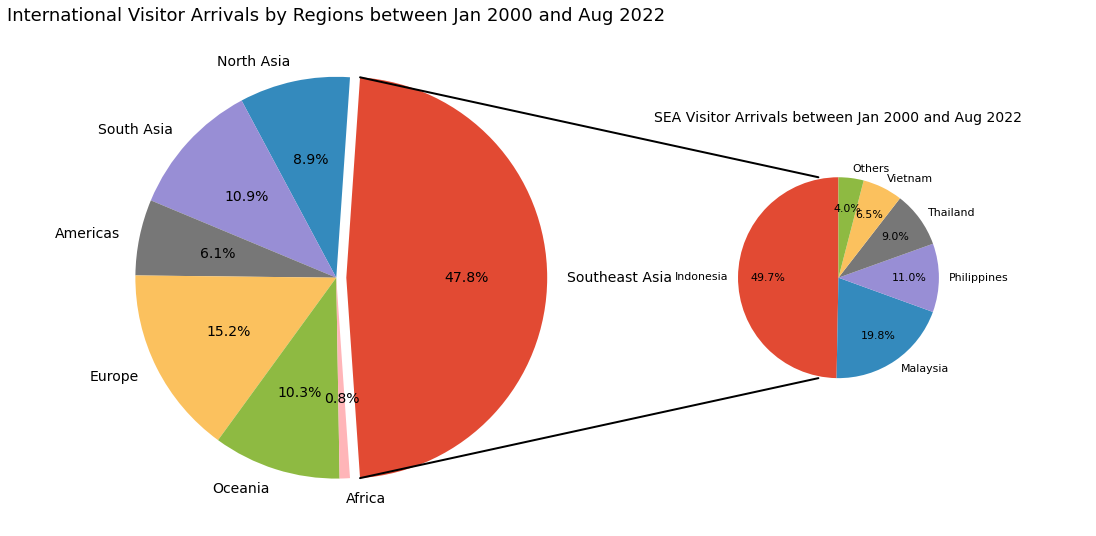

In [11]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
fig.subplots_adjust(wspace=0)

ax1.set_title(
    "International Visitor Arrivals by Regions between Jan 2000 and Aug 2022",     
    fontdict={'fontsize': 18, 'fontweight' : 20}
)
ax2.set_title(
    'SEA Visitor Arrivals between Jan 2000 and Aug 2022',     
    fontdict={'fontsize': 14, 'fontweight' : 10},
    y=0.8
)

# big chart
ratios = [float(i)/sum(regions['Total']) for i in regions['Total']]
labels = list(regions.index)
explode = [0.05 if label == 'Southeast Asia' else 0 for label in labels]
angle = -180 * ratios[labels.index('Southeast Asia')]

ax1.pie(
    ratios, autopct='%1.1f%%', startangle=angle,
    labels=labels, explode=explode, textprops={'fontsize': 14},
)

# small chart
ratios = sea_df['Total']
labels = sea_df.index
width = .2
ax2.pie(
    ratios, autopct='%1.1f%%', startangle=90,
    labels=labels, radius=0.5, textprops={'fontsize': 11}, pctdistance=0.7
)

# connection line
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(
    xyA=(- width / 2, .5), 
    xyB=(x, y), 
    coordsA="data", coordsB="data", 
    axesA=ax2, axesB=ax1
)
con.set_color([0, 0, 0])
con.set_linewidth(2)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(
    xyA=(- width / 2, -.5), 
    xyB=(x, y), 
    coordsA="data", coordsB="data", 
    axesA=ax2, axesB=ax1
)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(2)

plt.savefig('img/nationalities.png', bbox_inches='tight')
plt.show()

## Time series

In [12]:
years = list(range(2000, 2023))

In [13]:
total = nationalities.loc['Total International Visitor Arrivals By Inbound Tourism Markets'][:-1]
total

2022 Aug    728744
2022 Jul    726602
2022 Jun    543733
2022 May    418458
2022 Apr    295095
             ...  
2000 May    595838
2000 Apr    636970
2000 Mar    640922
2000 Feb    601281
2000 Jan    637852
Name: Total International Visitor Arrivals By Inbound Tourism Markets, Length: 272, dtype: int64

In [14]:
total.index

Index(['2022 Aug', '2022 Jul', '2022 Jun', '2022 May', '2022 Apr', '2022 Mar',
       '2022 Feb', '2022 Jan', '2021 Dec', '2021 Nov',
       ...
       '2000 Oct', '2000 Sep', '2000 Aug', '2000 Jul', '2000 Jun', '2000 May',
       '2000 Apr', '2000 Mar', '2000 Feb', '2000 Jan'],
      dtype='object', length=272)

In [15]:
for year in years:
    curr = 0
    for i in total.index:
        if str(i)[:4] == str(year):
            curr += total[i]
    total[str(year)] = curr

In [16]:
total = total[[str(x) for x in years]]
total

2000     7691399
2001     7522163
2002     7566832
2003     6126948
2004     8328644
2005     8943021
2006     9751141
2007    10284545
2008    10116054
2009     9682690
2010    11641701
2011    13171303
2012    14496092
2013    15567923
2014    15095152
2015    15231469
2016    16403459
2017    17424611
2018    18508302
2019    19116016
2020     2742443
2021      330059
2022     2958777
Name: Total International Visitor Arrivals By Inbound Tourism Markets, dtype: int64

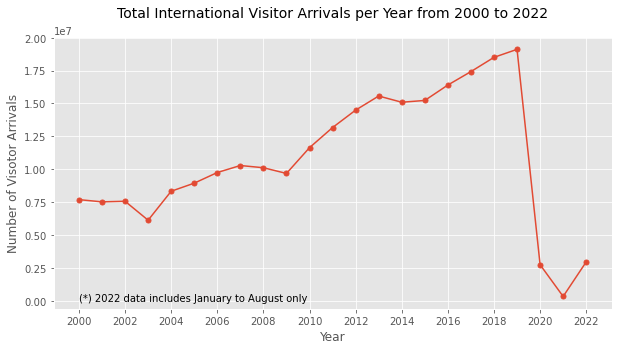

In [17]:
plt.figure(figsize=(10,5))
plt.plot(total, marker='o', markersize=5)
plt.title('Total International Visitor Arrivals per Year from 2000 to 2022', fontsize=14, y=1.05)
plt.xticks([x for x in total.index if int(x) % 2 == 0])
plt.xlabel('Year')
plt.ylabel('Number of Visotor Arrivals')
plt.text(0,0,'(*) 2022 data includes January to August only')
plt.savefig('img/total.png', bbox_inches='tight')
plt.show()

In [18]:
regions_cp = regions.copy()
regions_cp

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2000 Sep,2000 Aug,2000 Jul,2000 Jun,2000 May,2000 Apr,2000 Mar,2000 Feb,2000 Jan,Total
Data Series,,,,,,,,,,,,,,,,,,,,,
Southeast Asia,315820,332110,269088,204656,137294,41170,18759,17563,30006,12937,...,187575,186800,216845,201640,190775,208686,193663,169471,226457,92519989
North Asia,50394,40868,25153,16953,9940,3555,2508,2505,2770,2032,...,0,0,0,0,0,0,0,0,0,17217087
South Asia,94325,94977,76667,69978,52271,36779,20077,16901,33939,11879,...,41994,42366,43995,51863,56557,44475,35841,32902,33926,21095525
Americas,44100,47360,36723,25106,14729,6521,4442,2928,4590,2231,...,34764,39201,42133,39138,36733,36515,46652,43103,41004,11816768
Europe,110258,83292,48879,42110,32971,14625,10444,7225,9450,5668,...,83964,102605,92623,70483,73074,98348,104919,103653,94075,29342043
Oceania,65622,77562,55574,35326,29323,8126,4673,3882,5632,1668,...,62655,53711,61102,51210,46840,50352,43922,36296,48764,19886906
Africa,2903,2582,2184,1300,814,129,58,114,74,79,...,7297,9017,9129,7508,7569,10398,8769,6035,7756,1595330


In [19]:
sea_df_1 = nationalities.loc(axis=0)[
    'Brunei Darussalam', 'Indonesia', 'Malaysia',
    'Myanmar', 'Philippines', 'Thailand', 'Vietnam',
    'Other Markets In Southeast Asia'
].iloc[:, :80]

new_row = sea_df_1.loc['Other Markets In Southeast Asia'] + sea_df_1.loc['Brunei Darussalam'] + sea_df_1.loc['Myanmar']
sea_df_1.loc['Others'] = new_row
sea_df_1.drop(index=['Brunei Darussalam', 'Other Markets In Southeast Asia', 'Myanmar'], inplace=True)

sea_df_1

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,2022 Feb,2022 Jan,2021 Dec,2021 Nov,...,2016 Oct,2016 Sep,2016 Aug,2016 Jul,2016 Jun,2016 May,2016 Apr,2016 Mar,2016 Feb,2016 Jan
Data Series,,,,,,,,,,,,,,,,,,,,,
Indonesia,108252,119072,110094,86745,58330,13622,6872,5885,11177,5756,...,213070,186610,210626,319759,235444,258606,215353,238160,216284,249876
Malaysia,63905,61572,49878,43214,25319,10610,4467,5203,10939,2537,...,92736,93519,81655,100397,91901,92668,97070,98135,85850,87208
Philippines,42542,45336,32139,22379,16940,6250,2026,1469,1966,2450,...,57924,45804,50362,55005,56702,76646,74245,58963,47217,44334
Thailand,33284,36590,23406,18487,10647,3038,1622,1060,1421,361,...,58094,36911,39434,49788,36982,52331,62514,48381,38650,44330
Vietnam,48939,48869,36857,21570,16657,2932,1055,627,840,407,...,32192,32777,46773,59800,52449,40046,38398,33122,35731,29145
Others,18898,20671,16714,12261,9401,4718,2717,3319,3663,1426,...,17582,17557,18902,22541,20007,21498,28478,22262,16864,18112


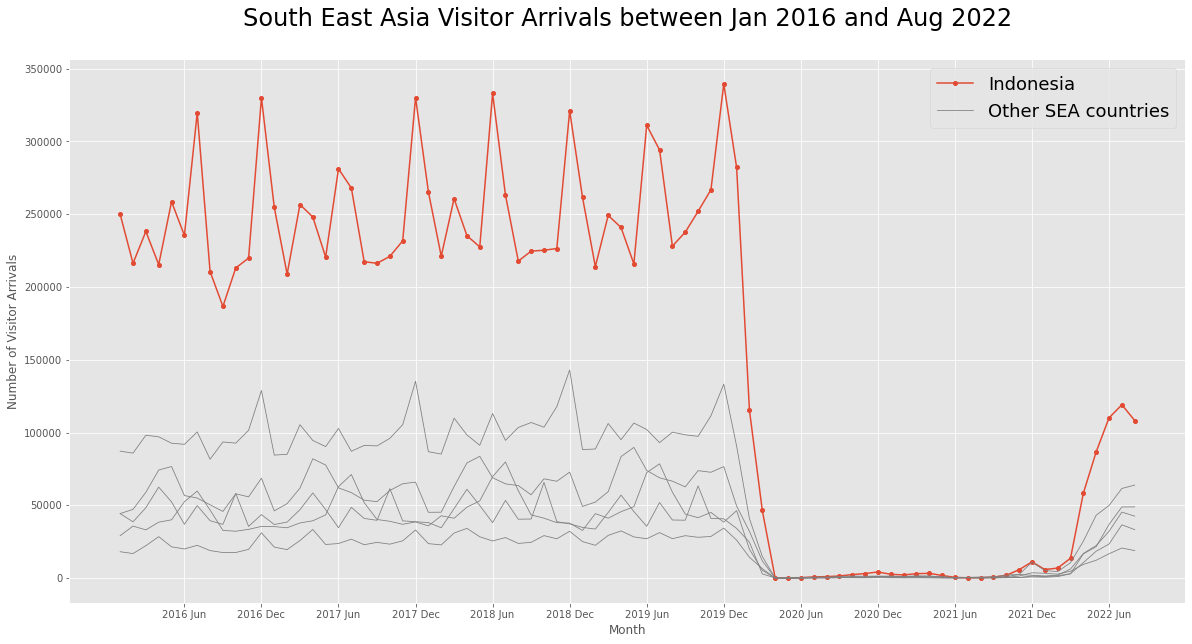

In [20]:
plt.figure(figsize=(20,10))
plt.title('South East Asia Visitor Arrivals between Jan 2016 and Aug 2022', fontsize=24, y=1.05)
has_others = False
for row in sea_df_1.index:
    if row == 'Indonesia':
        plt.plot(sea_df_1.loc[row][::-1], label=row, marker='o', markersize=4)
    elif not has_others:
        plt.plot(sea_df_1.loc[row][::-1], markersize=4, color='grey', linewidth=0.8, label='Other SEA countries')
        has_others = True
    else:
        plt.plot(sea_df_1.loc[row][::-1], markersize=4, color='grey', linewidth=0.8)
plt.xticks([x for x in sea_df_1.columns[::-1] if 'Dec' in str(x) or 'Jun' in str(x)])
plt.legend(fontsize=18)
plt.xlabel('Month')
plt.ylabel('Number of Visitor Arrivals')
plt.savefig('img/sea.png', bbox_inches='tight')
plt.show()

In [21]:
total_1422 = nationalities.iloc[0, :80]
total_1422

2022 Aug     728744
2022 Jul     726602
2022 Jun     543733
2022 May     418458
2022 Apr     295095
             ...   
2016 May    1357543
2016 Apr    1393972
2016 Mar    1406607
2016 Feb    1335097
2016 Jan    1412123
Name: Total International Visitor Arrivals By Inbound Tourism Markets, Length: 80, dtype: int64

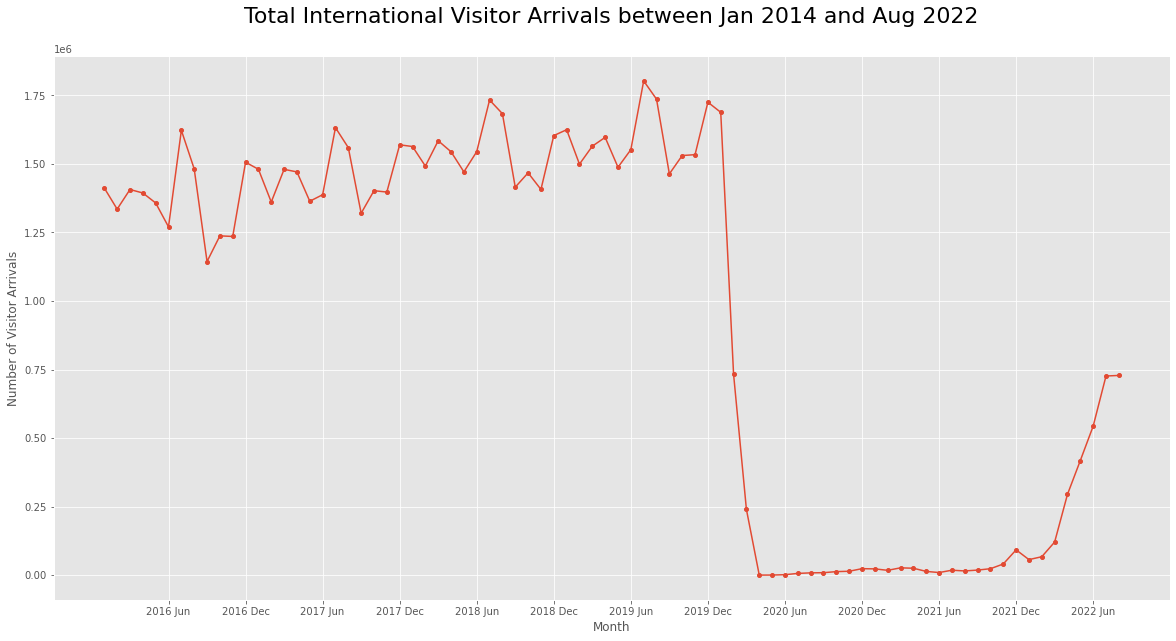

In [22]:
plt.figure(figsize=(20,10))
plt.title('Total International Visitor Arrivals between Jan 2014 and Aug 2022', fontsize=22, y=1.05)
plt.plot(total_1422[::-1], marker='o', markersize=4)
plt.xticks([x for x in total_1422.index[::-1] if 'Dec' in str(x) or 'Jun' in str(x)])
plt.xlabel('Month')
plt.ylabel('Number of Visitor Arrivals')
# plt.savefig('img/total1.png', bbox_inches='tight')
plt.show()

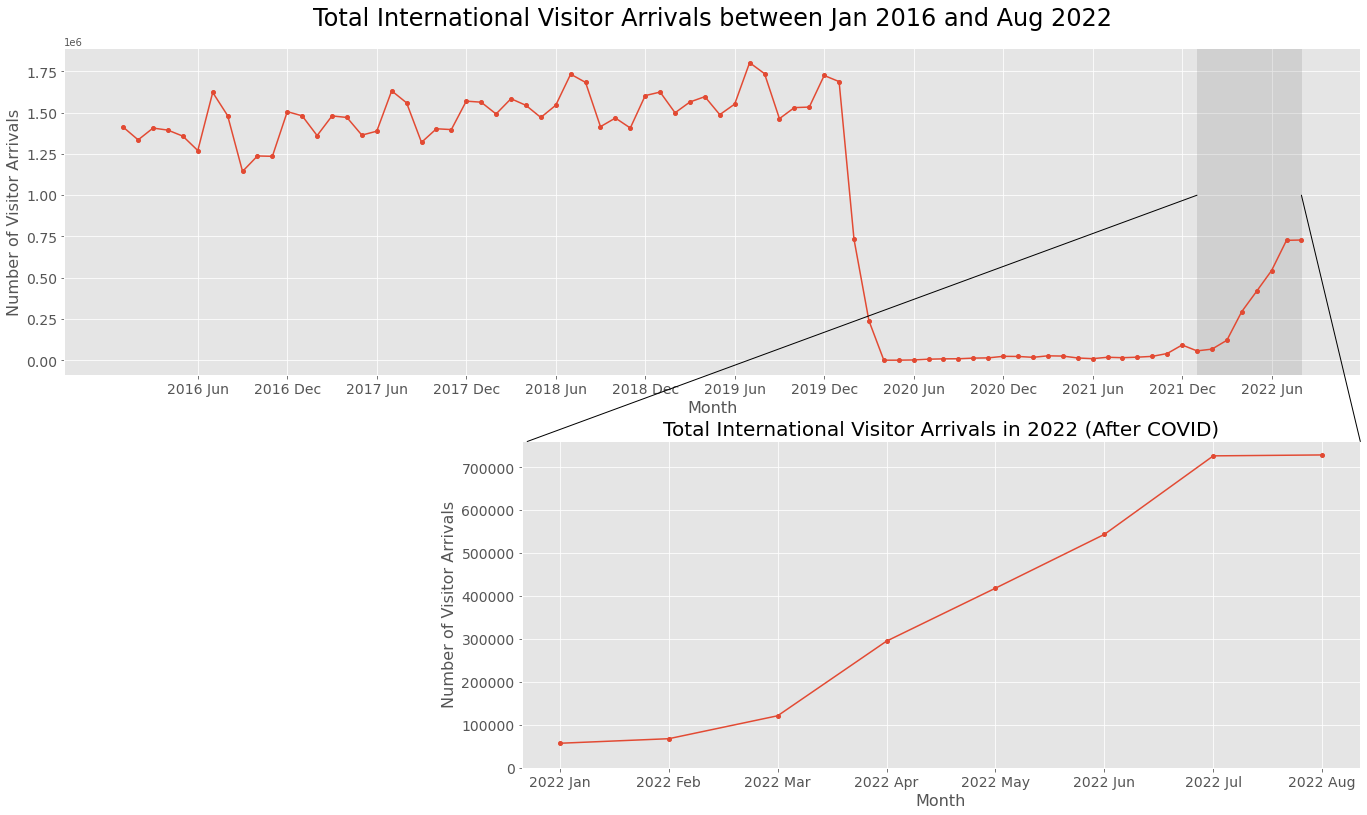

In [23]:
fig = plt.figure(figsize=(18,10))
plt.subplots_adjust(bottom = 0., left = 0, top = 1., right = 1)

sub1 = fig.add_subplot(2,3,(1,3)) 
plt.title('Total International Visitor Arrivals between Jan 2016 and Aug 2022', fontsize=24, y=1.05)
plt.plot(total_1422[::-1], marker='o', markersize=4)
plt.xticks([x for x in total_1422.index[::-1] if 'Dec' in str(x) or 'Jun' in str(x)], fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Visitor Arrivals', fontsize=16)
sub1.axvspan('2022 Jan', '2022 Aug', alpha=0.2, color='gray')


sub2 = fig.add_subplot(2,3,(5,6)) 
plt.title('Total International Visitor Arrivals in 2022 (After COVID)', fontsize=20)
plt.plot(total_1422[::-1][-8:], marker='o', markersize=4)
plt.xticks([x for x in sea_df_1.columns[::-1][-8:]], fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(range(0,700001,100000))
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Visitor Arrivals', fontsize=16)


con1 = ConnectionPatch(
    xyA=(72, 1000000), coordsA=sub1.transData, 
    xyB=(-0.3, 760000), coordsB=sub2.transData, 
    color = 'black', linewidth=1
)
fig.add_artist(con1)

con2 = ConnectionPatch(
    xyA=(79, 1000000), coordsA=sub1.transData, 
    xyB=(7.35, 760000), coordsB=sub2.transData, 
    color = 'black', linewidth=1
)
fig.add_artist(con2)

plt.savefig('img/total2.png', bbox_inches='tight')

## Demographics

In [24]:
demographic = pd.read_excel('data/Demographic.xlsx')
demographic

,Data Series,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,Total
0,Total,728744,726602,543733,418458,295095,121207,2833839.0
1,Males,375963,371518,280284,223467,160563,73672,1485467.0
2,Females,352779,355077,263439,194989,134525,47532,1348341.0
3,Under 15 Years,64064,78894,54166,32467,25859,6479,261929.0
4,15-19 Years,29326,37334,22970,10944,8110,2100,110784.0
5,20-24 Years,66314,66267,42754,28871,18761,8833,231800.0
6,25-34 Years,187932,169824,128450,108939,77804,36225,709174.0
7,35-44 Years,148400,146692,114453,90507,65000,29183,594235.0
8,45-54 Years,110418,112264,83636,65094,44074,16796,432282.0
9,55-64 Years,76569,71728,57907,49307,32459,12028,299998.0


In [25]:
demographic = demographic.dropna()
demographic.columns = demographic.columns.str.strip()
demographic['Avg'] = round(demographic['Total'] / 6)
demographic.set_index('Data Series', inplace=True)

/var/folders/l3/2pgq90f125lbwlmh0s3lrt4m0000gp/T/ipykernel_9046/2516949441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic['Avg'] = round(demographic['Total'] / 6)


In [26]:
ages_df = demographic.iloc[3:]
ages_df

,2022 Aug,2022 Jul,2022 Jun,2022 May,2022 Apr,2022 Mar,Total,Avg
Data Series,,,,,,,,
Under 15 Years,64064,78894,54166,32467,25859,6479,261929.0,43655.0
15-19 Years,29326,37334,22970,10944,8110,2100,110784.0,18464.0
20-24 Years,66314,66267,42754,28871,18761,8833,231800.0,38633.0
25-34 Years,187932,169824,128450,108939,77804,36225,709174.0,118196.0
35-44 Years,148400,146692,114453,90507,65000,29183,594235.0,99039.0
45-54 Years,110418,112264,83636,65094,44074,16796,432282.0,72047.0
55-64 Years,76569,71728,57907,49307,32459,12028,299998.0,50000.0
65 & Over,45721,43599,39397,32329,23028,9563,193637.0,32273.0


In [27]:
avg_per_month = demographic.loc['Females']['Avg'] + demographic.loc['Males']['Avg']

def fmt(x):
    return '{:.1f}%\n({:.0f})'.format(x, (avg_per_month)*x/100)

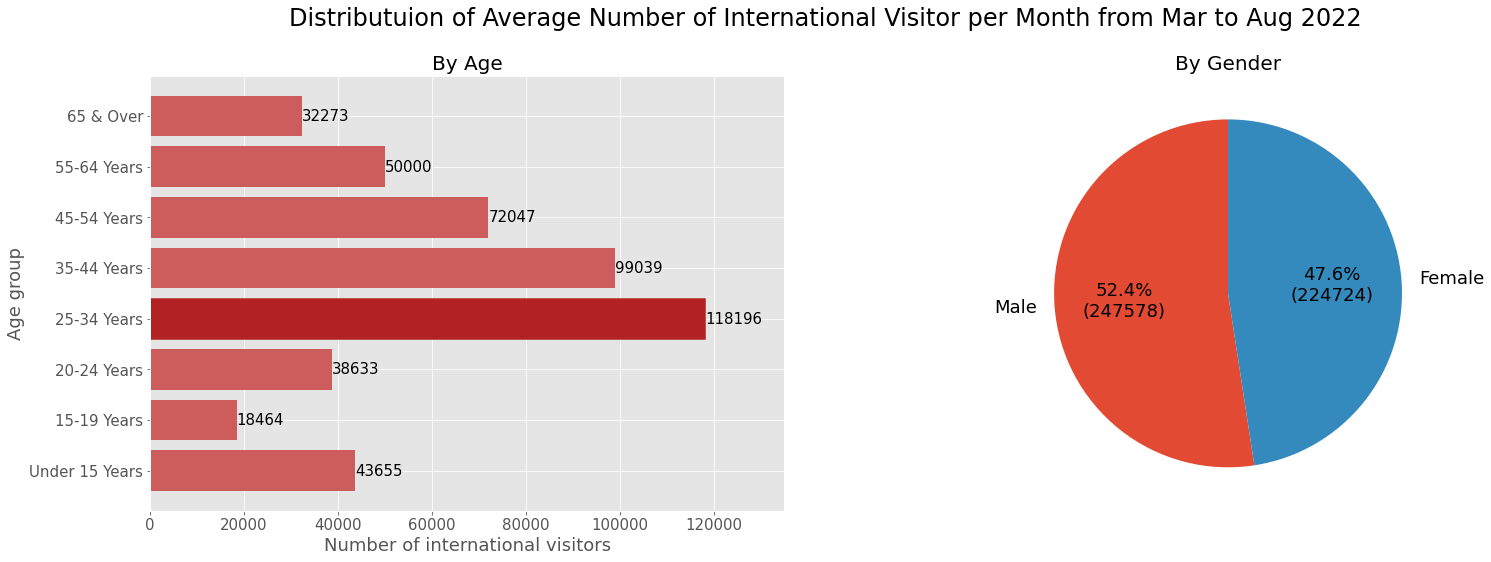

In [28]:
fig = plt.figure(figsize=(25,8))
fig.suptitle(
    'Distributuion of Average Number of International Visitor per Month from Mar to Aug 2022', 
    fontsize=24,
    y=1
)

plt.subplot(1, 2, 1)
barlist = plt.barh(ages_df.index, ages_df['Avg'], color='indianred')
barlist[3].set_color('firebrick')
plt.bar_label(barlist, fontsize=15)
plt.xlim(0,135000)
plt.title('By Age', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of international visitors', fontsize=18)
plt.ylabel('Age group', fontsize=18)

plt.subplot(1, 2, 2)
plt.title('By Gender', fontsize=20)
plt.pie(
    [demographic.loc['Males']['Avg'], demographic.loc['Females']['Avg']], 
    labels=['Male', 'Female'],
    autopct=fmt,
    startangle=90,
    textprops={'fontsize': 18}
)

plt.savefig('img/demo.png', bbox_inches="tight")
plt.show()